In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

In [2]:
!head farmakoloski.dat

#x[doza]	y[odziv]
1       0.0001
2	0.001
7	15.3
10	34.6
20	49.3
70	82.6
200	96.0
1000	100.0


In [11]:
data = np.loadtxt("farmakoloski.dat")
x,y = data[:,0], data[:,1]

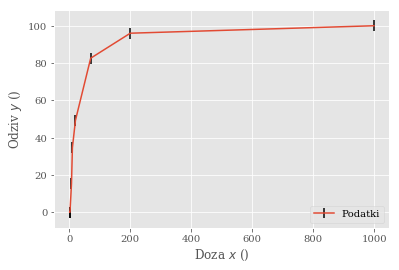

In [19]:
plt.errorbar(x,y,yerr=3, ecolor="k", label="Podatki")
plt.legend(loc="lower right")
plt.xlabel(r"Doza $x$ ()")
plt.ylabel(r"Odziv $y$ ()")
plt.savefig("1-1-originalni-podatki.pdf")
plt.show()

/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


POPT3: 
[99.60561766 19.76743041  1.36410424]
PCOV3: 
[[12.47205078  5.69583275 -0.37246231]
 [ 5.69583275  5.21504097 -0.23513901]
 [-0.37246231 -0.23513901  0.03127551]]
korelacijska matrika:
[[ 1.          0.70625158 -0.59636369]
 [ 0.70625158  1.         -0.58222872]
 [-0.59636369 -0.58222872  1.        ]]
reduciran Hi-kvadrat:
3.118927469555887


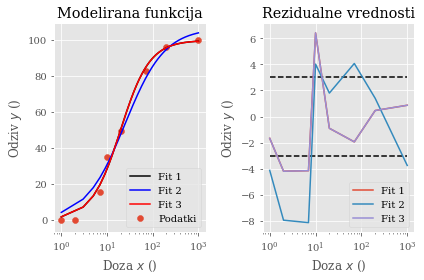

In [55]:
def hikvadrat(yi, xi, model,  sigme, *args,reduced=True):
    assert isinstance(sigme, int) or len(sigme) == len(yi), "Dimenzija napak ne štima! (oblika bodi 1 ali yi.shape)"
    assert yi.shape == xi.shape, "Dimenzije y_i in x_i ne štimajo! (xi.shape != yi.shape)"
    
    if reduced:
        return np.sum((yi - model(xi, *args))**2/sigme**2)/len(args)
    else:
        return np.sum((yi - model(xi, *args))**2/sigme**2)
    
def model(x, y0, a, p):
    return y0*(x**p)/(x**p+a**p)

def model2(x, y0, a):
    return y0*(x)/(x+a)

def kormat(C):
    from numpy.linalg import inv
    D=np.zeros(C.shape)
    np.fill_diagonal(D, np.diag(C))
    D = np.sqrt(D)
    return inv(D) @ C @ inv(D)
    
razpon = np.linspace(x.min(), x.max(), 500)
popt, pcov = curve_fit(model, x, y, sigma=np.full(x.shape, 3), method="lm")
popt2, pcov2 = curve_fit(model2, x, y, sigma=np.full(x.shape, 3), method="lm")
popt3, pcov3 = curve_fit(model, x, y, sigma=np.full(x.shape, 3), method = "dogbox")
print("POPT3: ", popt3, sep="\n")
print("PCOV3: ", pcov3, sep="\n")
print("korelacijska matrika:", kormat(pcov3), sep="\n")
print("reduciran Hi-kvadrat:", hikvadrat(y,x,model, 3, *popt3), sep="\n")

plt.subplot(121)
plt.title("Modelirana funkcija")
plt.plot(razpon, model(razpon, *popt), label="Fit 1", c="k")
plt.plot(razpon, model2(razpon, *popt2), label="Fit 2 ", c="b")
plt.plot(razpon, model(razpon, *popt3), label="Fit 3 ", c="r")
plt.scatter(x, y, label="Podatki")
plt.legend(loc="lower right")
plt.xlabel(r"Doza $x$ ()")
plt.ylabel(r"Odziv $y$ ()")
plt.semilogx()

plt.subplot(122)
plt.title("Rezidualne vrednosti")
plt.plot(x, y-model(x, *popt), label="Fit 1")
plt.plot(x, y-model2(x, *popt2), label="Fit 2")
plt.plot(x, y-model(x, *popt3), label="Fit 3")
plt.hlines(y=3, xmax=x.max(), xmin=x.min(), linestyles="dashed")
plt.hlines(y=-3, xmax=x.max(), xmin=x.min(), linestyles="dashed")
plt.legend()
plt.xlabel(r"Doza $x$ ()")
plt.ylabel(r"Odziv $y$ ()")
plt.semilogx()
plt.tight_layout(h_pad=1.05)

plt.savefig("1-2-obafita1.pdf")
plt.savefig("1-2-obafita1.jpg")
plt.show()


In [37]:
hikvadrat(y,x,model, 3, *popt)

3.1189274694654885

In [40]:
kormat(pcov)

array([[ 1.        ,  0.70625013, -0.59636239],
       [ 0.70625013,  1.        , -0.58222822],
       [-0.59636239, -0.58222822,  1.        ]])

TypeError: can't pickle function objects